# Section 2: Datasets

In this section we introduce how to effectively create and read a dataset. We classified datasets in three formats:

* **Raw Data:** raw data are available the same way they were collected. For example: PE executables, ELF or APK packages;
* **Attributes:** filtered metadata extracted from the raw data with less noise and focus on the data that really matters. For example: CSV with metadata, execution logs of a sofware or data extracted from its header;
* **Features:** features extracted from the attributes or raw data ready to be used in a classifier. For example: feature vectors extracted from the attributes collected before.

With these definitions in mind, we will first introduce how to extract attributes from raw data. 

## Requirements:

* **Python Version**: make sure you are using **Python 3.5 or higher**.
* **Libraries:** all the python libraries used can be found in the file "requirements.txt". To install them, just run the following command (using pip): 
> *pip install -r requirements.txt*
* **Datasets:** the datasets located at folder "./datasets/" are going to be used in our entire course. They are all in .zip extension. When extracting, make sure the .csv are located in this same folder. To extract, use the following command from a terminal: 
> *unzip \<filename\>.zip*.

## Labeling Data

TODO

In [1]:
import requests
import json
# virus total report api
url = 'https://www.virustotal.com/vtapi/v2/file/report'
# api key (change it to yours)
API_KEY = "<api_key>"
# parameters: apikey is your apikey; resource is the file md5/sha1/sha256
params = {'apikey': API_KEY, 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917'}
# send request and get response
response = requests.get(url, params=params)
# print response
response.json()

{'md5': 'ab243d1fad9ed1af747f313ec88b3fd0',
 'permalink': 'https://www.virustotal.com/file/6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e/analysis/1521947751/',
 'positives': 48,
 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917',
 'response_code': 1,
 'scan_date': '2018-03-25 03:15:51',
 'scan_id': '6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e-1521947751',
 'scans': {'ALYac': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '1.1.1.5'},
  'AVG': {'detected': True,
   'result': 'FileRepMalware',
   'update': '20180325',
   'version': '18.2.3827.0'},
  'AVware': {'detected': True,
   'result': 'Trojan.Win32.Meredrop',
   'update': '20180325',
   'version': '1.5.0.42'},
  'Ad-Aware': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '3.0.3.1010'},
  'AegisLab': {'detected': True,
   'result': 'Troj.W32.Agent!c',
   'update': '20180325',
   'version': '4.2'}

## Reading a Dataset

TODO

### Brazilian Malware

TODO

In [2]:
import pandas as pd
# dataset location
data_path = "./datasets/brazilian-malware.csv"
# read CSV dataset
data = pd.read_csv(data_path)

In [3]:
data.shape

(50181, 29)

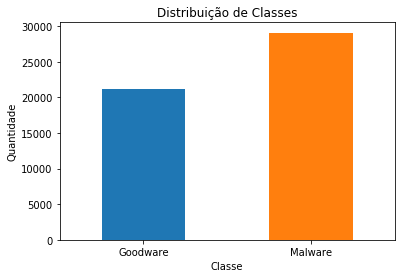

In [5]:
import matplotlib.pyplot as plt
# group data by label and create a bar plot
ax = data['Label'].groupby(
     data["Label"]).count().plot(kind="bar")
# set x label
ax.set_xlabel("Classe")
# set y label
ax.set_ylabel("Quantidade")
# set x tick labels and set it in horizontal position
ax.set_xticklabels(["Goodware", "Malware"], rotation='horizontal')
# set plot title
ax.set_title("Distribuição de Classes")
# savefig and show plot
plt.savefig("distribution_brmw.pdf")
plt.show()